In [1]:
import os
from bokeh import plotting

def cleanup():
    for filename in ['penguins.png', 'penguins.svg']:
        try:
            os.remove(filename)
        except FileNotFoundError:
            pass

os.chdir('examples')
cleanup()

plotting.output_notebook()

Loading BokehJS ...

# Data analysis

Our next special topic is how to analyze simple data sets in Python.

## pandas

As you may have noticed by now, the first step for almost any specialist task in Python is to [import](glossary.ipynb#import) an additional [package](glossary.ipynb#package) that provides some extra functionality. The most popular package for loading and working with tables of data is called `pandas`. We met it briefly already in the lesson on files, when we learned about [delimited text data files](files.ipynb#Delimited-text).

### Loading data

#### Text

Recall that a delimited text file stores a table of data as plain text, with one particular character (most often the comma) reserved as a [separator](glossary.ipynb#separator) to mark the boundaries between the columns of the table. Here is an example data file in which the separator is a comma (a *csv* file):

In [2]:
import os

filepath = os.path.join('data', 'penguins.csv')

with open(filepath) as f:
    for linenum in range(6):
        print(f.readline(), end='')

Bird,HeartRate,Depth,Duration
EP19,88.8,5,1.05
EP19,103.4,9,1.1833333
EP19,97.4,22,1.9166667
EP19,85.3,25.5,3.4666667
EP19,60.6,30.5,7.0833333


This file stores a table of data on the [heart rates of penguins during fishing dives](https://doi.org/10.1242/jeb.013235). Each row represents one dive, with the following columns:

* *Bird*: An ID code for the penguin making the dive.
* *HeartRate*: The penguin's heart rate during the dive, in beats per minute (bpm).
* *Depth*: The depth of the dive (in meters).
* *Duration*: The duration of the dive (in minutes).

Let's import `pandas` and use its `read_csv()` function to read this file:

In [3]:
import pandas

penguins = pandas.read_csv(filepath)

print(penguins)

       Bird  HeartRate  Depth   Duration
0      EP19       88.8    5.0   1.050000
1      EP19      103.4    9.0   1.183333
2      EP19       97.4   22.0   1.916667
3      EP19       85.3   25.5   3.466667
4      EP19       60.6   30.5   7.083333
..      ...        ...    ...        ...
120  EP3901       48.4  170.0  11.533333
121  EP3901       50.8   37.0   8.216667
122  EP3901       49.6  160.0  11.300000
123  EP3901       56.4  180.0  10.283333
124  EP3901       55.2  170.0  10.366667

[125 rows x 4 columns]


(The `...` indicates that some rows have not been shown, in order to keep the printout brief.)

#### Excel

As well as `read_csv()`, `pandas` provides many functions for reading data from different sources. You may sometimes need to read from a Microsoft Excel spreadsheet file. There is a function for this:

In [4]:
penguins_excel = pandas.read_excel(os.path.join('data', 'penguins.xlsx'))

`read_excel()` can take additional [arguments](glossary.ipynb#argument) for specifying which sheet of the Excel file to read, which rows or columns to skip, etc. in case your spreadsheet is a little messy. As always with new functions, it is a good idea to seek out and read the [online documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) to see what the possibilities are and whether there are any important defaults.

#### The internet

Some `pandas` [IO](glossary.ipynb#IO) functions can even read from a file stored online. Instead of a file [path](glossary.ipynb#path), we can also give `read_csv()` a [URL](glossary.ipynb#URL) that leads to a file on the internet.

In [5]:
url = 'https://raw.githubusercontent.com/luketudge/introduction-to-programming/master/content/examples/data/penguins.csv'

penguins_from_the_internet = pandas.read_csv(url)

### DataFrames

What [type](glossary.ipynb#type) of object do `pandas`' read functions give us?

In [6]:
type(penguins)

pandas.core.frame.DataFrame

They give us a 'data frame'. A [data frame](glossary.ipynb#dataframe) is very similar to a [matrix](glossary.ipynb#matrix). Like a matrix, a data frame stores values in a 'grid' of rows and columns. But whereas the structure of a matrix may represent all sorts of things, the roles of rows and columns are slightly more specific in a data frame.

Each *row* of a data frame represents one 'observation'. An observation is some coherent entity or event for which information was recorded. Each *column* of a data frame represents one measurement or piece of information that was recorded for each of the observations. For example, the observations in a data frame might be people, for whom some physical or demographic measurements were made, or they might be events like purchases in a store, for each of which a customer ID, product, price, etc. were recorded. In the penguins data frame, the observations are dives. (Note that the observations are not penguins, as it might be tempting to think; depth and duration are clearly attributes of individual dives, not of penguins).

Each row of a data frame may contain values of heterogeneous [types](glossary.ipynb#type), since not every piece of information recorded about each observation is necessarily of the same kind. For example, the penguins data frame records a [string](glossary.ipynb#string) ID for the bird making the dive, but the other values are [floats](glossary.ipynb#float). The values in a single column *are* necessarily of the same type, since we usually want to compare them with each other. For example, we would not be able to compare the dive depths of different penguins if some depths were recorded as floats, and others as strings such as `'quite deep'` or `'really deep'`.

#### Indexing

##### Columns

We can get individual columns from a `pandas.DataFrame` using the same square parenthesis [indexing](glossary.ipynb#index) as for other Python types. For example, to get a single column, the index is just the name of the column, as a [string](glossary.ipynb#string):

In [7]:
print(penguins['Depth'])

0        5.0
1        9.0
2       22.0
3       25.5
4       30.5
       ...  
120    170.0
121     37.0
122    160.0
123    180.0
124    170.0
Name: Depth, Length: 125, dtype: float64


As we can see in the output above, individual columns have a `dtype` [attribute](glossary.ipynb#attribute) just as `numpy` [arrays](arrays.ipynb#data-types) do:

In [8]:
penguins['Depth'].dtype

dtype('float64')

Any column that does not contain only numbers `pandas` will treat as being of data type 'object' (abbreviated to 'O'), which is a sort of catch-all data type for non-numbers. In practice, this usually means [strings](glossary.ipynb#string), as is the case for example for the 'Bird' column in the penguins data frame:

In [9]:
penguins['Bird'].dtype

dtype('O')

We can get multiple columns using a [list](glossary.ipynb#list) of column names. Note the double square parentheses. The outer parentheses are for indexing, and the inner parentheses indicate that the index is a list:

In [10]:
print(penguins[['Depth', 'Duration']])

     Depth   Duration
0      5.0   1.050000
1      9.0   1.183333
2     22.0   1.916667
3     25.5   3.466667
4     30.5   7.083333
..     ...        ...
120  170.0  11.533333
121   37.0   8.216667
122  160.0  11.300000
123  180.0  10.283333
124  170.0  10.366667

[125 rows x 2 columns]


If we ever need to check what columns a `pandas.DataFrame` contains, the `columns` attribute can tell us:

In [11]:
penguins.columns

Index(['Bird', 'HeartRate', 'Depth', 'Duration'], dtype='object')

##### Rows

Whereas indexing columns from a `pandas.DataFrame` is relatively straightforward, indexing rows presents some frustrating subtleties. Let's take a careful look.

We can use a [slice](glossary.ipynb#slice) index to get a range of rows, just as we would to get a range of entries from a [list](glossary.ipynb#list). This at least is straightforward:

In [12]:
print(penguins[5:15])

    Bird  HeartRate  Depth   Duration
5   EP19       77.6   32.5   4.766667
6   EP19       44.3   38.0   9.133333
7   EP19       32.8   32.0  11.000000
8   EP19       94.2    6.0   1.316667
9   EP19       99.8   10.5   1.483333
10  EP19      104.5    6.0   1.166667
11  EP19       78.0   19.5   2.716667
12  EP19       54.2   27.5   7.250000
13  EP19       79.0   33.5   4.783333
14  EP19       42.9   40.5  11.866667


However, not all is as it seems here. The first frustration is that we *must* use a slice to index rows like this. We cannot get a single row using a single integer as an index, as we would for a list. And the error message that we get if we try to do this is a horrible mess:

In [13]:
penguins[5]

KeyError: 5

We can patch up this limitation by using a slice that contains only one row. For example:

In [14]:
print(penguins[5:6])

   Bird  HeartRate  Depth  Duration
5  EP19       77.6   32.5  4.766667


##### pandas madness

The astute question to ask here is of course: Why? Why can't we get a single row of a `pandas.DataFrame` just as easily as getting a single entry from a list?

The reason (though whether you consider it a *good* reason is for you to decide) is that `pandas` somewhat tries to second-guess what the user wants when they index a data frame. If we use a [slice](glossary.ipynb#slice) index, then `pandas` assumes we want a subset of row numbers, but if we use anything else as the index, such as a single value or a list, then pandas assumes we want a column or subset of columns.

So when we asked for `penguins[5]` above, `pandas` actually tried to get a column whose name is the integer `5`. And of course there is no such column in our data frame.

###### iloc

If we want to index rows and columns, it is best not to let `pandas` second-guess what we are trying to do. Instead, we should tell `pandas` explicitly whether our index is a position or a name. `pandas`' system for doing this is a little unintuitive. A `pandas.DataFrame` has two different [attributes](glossary.ipynb#attribute) for accessing the data by position or by name. These attributes can be indexed.

The `iloc` attribute stores the data by position ('`iloc`' is an abbreviation of 'integer location'). So the explicit way to get row number `5` without `5` being interpreted as a column name is to apply the index `[5]` to the `iloc` attribute instead of to the data frame itself:

In [15]:
penguins.iloc[5]

Bird             EP19
HeartRate        77.6
Depth            32.5
Duration     4.766667
Name: 5, dtype: object

The indexing attributes also allow for a *row,column* pair of indices, just like a `numpy` [array](glossary.ipynb#array) does. The first index refers to the row, and the second to the column.

So for example to get the value in row `5`, column `2`:

In [16]:
penguins.iloc[5, 2]

32.5

But it is only rarely useful to get columns by position. Columns usually have meaningful names, in which case we should use those instead.

###### loc

If we want to get rows and columns by name and not by position, the corresponding attribute for this is called `loc` (a not very helpful abbreviation of just 'location').

We have seen that columns have names, but do the rows also have names? Indeed they do. The names of the rows are simply the same as their positions. (Though there are some rare cases in which the rows may have been assigned alternative names).

So somewhat confusingly, both `iloc` and `loc` give the same result when we just ask for a row, because the integer index is both the position and the name of the row:

In [17]:
penguins.loc[5]

Bird             EP19
HeartRate        77.6
Depth            32.5
Duration     4.766667
Name: 5, dtype: object

But `loc` allows us to additionally index one or more columns by name, which is its real advantage:

In [18]:
penguins.loc[5, 'Duration']

4.7666667

In [19]:
penguins.loc[5, ['Depth', 'Duration']]

Depth           32.5
Duration    4.766667
Name: 5, dtype: object

There is one final important subtlety to note about the `loc` and `iloc` attributes. To see what it is, let's first [assign](glossary.ipynb#assignment) a subset of rows into a new data frame variable:

In [20]:
penguins_subset = penguins[5:15]

print(penguins_subset)

    Bird  HeartRate  Depth   Duration
5   EP19       77.6   32.5   4.766667
6   EP19       44.3   38.0   9.133333
7   EP19       32.8   32.0  11.000000
8   EP19       94.2    6.0   1.316667
9   EP19       99.8   10.5   1.483333
10  EP19      104.5    6.0   1.166667
11  EP19       78.0   19.5   2.716667
12  EP19       54.2   27.5   7.250000
13  EP19       79.0   33.5   4.783333
14  EP19       42.9   40.5  11.866667


As you can see from the printout above, the rows in the new smaller data frame retain their original names. An important consequence of this is that once we have taken a subset of rows, the row names are no longer the same as the row positions. This difference shows up when we use the `iloc` and `loc` indexing methods.

Since `iloc` gets rows by position, `iloc[5]` still gets us the sixth row, but in our subset, this row has the name `10`:

In [21]:
penguins_subset.iloc[5]

Bird             EP19
HeartRate       104.5
Depth             6.0
Duration     1.166667
Name: 10, dtype: object

`loc`, on the other hand, gets rows by name, and the names now refer to the positions in the *original* data frame, so `iloc[5]` gets us the row that was called `5` in the original data frame:

In [22]:
penguins_subset.loc[5]

Bird             EP19
HeartRate        77.6
Depth            32.5
Duration     4.766667
Name: 5, dtype: object

Yes, you read all that correctly:

* Indexing a `pandas.DataFrame` does something very different depending on whether the index is a slice or a single value.
* In any case, the recommended way of indexing is to index an *attribute* of the data frame rather than the data frame itself.
* And to cap it all, these attributes have such fabulously clear and intuitive names as `loc` and `iloc`!

If you are now thoroughly confused, you are in good company. Enter a question or complaint about `pandas` indexing into an internet search engine and you will discover a rich literature of lamentations. Indexing is among a handful of irritating minor quirks in the design of the `pandas` package. It probably could have been thought through a little more carefully, but `pandas` is otherwise so useful and has become so widely used that it would now be difficult for the developers to change it and risk breaking all the great data analysis programs that have been written with `pandas` so far. So we are stuck with it, and must console ourselves by finding ever more creative ways of complaining about it on the internet.

![](images/pandas_chaos.jpg)

(Image source: Mei 'Nanny Mei' Yan, [Chengdu Research Base of Giant Panda Breeding](http://www.panda.org.cn/english))

#### Boolean indexing

I have perhaps been a little harsh on `pandas`. Its somewhat messy methods for row indexing are not such a big deal if we bear in mind that selecting rows by position is not actually such a common thing to want to do in data analysis. After all, the rows of a data frame are often arranged in an arbitrary order; it is the values stored in the rows that gives them meaning, not their position in the data frame.

A much more common task in data analysis is to select rows based on some condition concerning their values. For example, in the penguins data we might want to work with all the rows that represent dives deeper than 150 meters. We would need to get all the rows that have a value greater than `150` in the 'Depth' column. The position of those rows is irrelevant.

In the [lesson on conditions](conditions.ipynb#logic), we learned how to write logical statements to ask whether a certain condition holds. We can use a column of a `pandas.DataFrame` in the same kind of statement. The result is a sequence of [boolean](glossary.ipynb#boolean) values (i.e. `True` or `False`), one for each row in the data frame, stating whether the condition holds for that row.

For example:

In [23]:
penguins['Depth'] > 150

0      False
1      False
2      False
3      False
4      False
       ...  
120     True
121    False
122     True
123     True
124     True
Name: Depth, Length: 125, dtype: bool

These statements can in turn be used as indices (directly with the data frame, not with `loc` or `iloc`) to select those rows where the statement is `True`. For example:

In [24]:
print(penguins[penguins['Depth'] > 150])

         Bird  HeartRate  Depth   Duration
32   EP432001       47.8  170.0  10.033333
33   EP432001       44.9  160.0   9.983333
46   EP432001       48.6  160.0   7.466667
47   EP432001       43.8  160.0   8.000000
113    EP3901       77.5  225.0   7.466667
114    EP3901       71.6  225.0   8.616667
117    EP3901       50.6  175.0  10.783333
119    EP3901       42.1  165.0  13.533333
120    EP3901       48.4  170.0  11.533333
122    EP3901       49.6  160.0  11.300000
123    EP3901       56.4  180.0  10.283333
124    EP3901       55.2  170.0  10.366667


The additional [operators](glossary.ipynb#operator) `&` (AND) and `|` (OR) can be used to combine multiple conditions.

For example if we want all the rows representing dives that were fairly deep and also quite short:

In [25]:
print(penguins[(penguins['Depth'] > 50) & (penguins['Duration'] < 5)])

        Bird  HeartRate  Depth  Duration
21      EP22       97.3   66.5  2.316667
38  EP432001       68.1  100.0  3.350000


This 'boolean indexing' is much more commonly useful than indexing by row number.

### Summaries

There is more good news about `pandas`. A `pandas.DataFrame` has a few really useful [methods](glossary.ipynb#method) for producing summaries of the data.

Often one of the first steps when exploring some new data is to get an idea of the spread or 'distribution' of the different values in each column. We might want to know what the lowest and highest values are, what the most common values are, and so on. This gives us a better feel for the scales of measurement, and can sometimes reveal values that are unusual or might even have been entered incorrectly when the data were recorded.

#### Numbers

Summarizing multiple values in one number is also known as 'aggregating' the values. The `aggregate()` method of a `pandas.DataFrame` [returns](glossary.ipynb#return) a new shorter data frame containing only aggregated values. The first [argument](glossary.ipynb#argument) to `aggregate()` specifies what function or functions to use to aggregate the data. These functions can be [built-in](glossary.ipynb#builtin) Python functions, or functions from a [module](glossary.ipynb#module) that we have [imported](glossary.ipynb#import). A lot of common aggregation functions can be found in the [`statistics` module](https://docs.python.org/3/library/statistics.html) in Python's [standard library](standard_library.ipynb):

* `median()`. The value that is in the 'middle' of the data when the values are arranged in order.
* `mean()`. The sum of all the values, divided by the number of values (i.e. the value that would result if the total amount were 'shared equally' among all the observations).
* `stdev()`. A measure of how far values tend to be from the mean, on average. So this indicates how 'spread out' the values are.

If we want to apply multiple aggregation functions, then it is a little clearer to first gather the functions in a [list](glossary.ipynb) [variable](glossary.ipynb#variable), and then pass this list variable into the `aggregate()` method. Like this:

In [26]:
import statistics

summary_stats = [min, statistics.median, statistics.mean, statistics.stdev, max]

Note an important subtlety here: So far, we have almost always placed parentheses after function names, in order to [call](glossary.ipynb#call) them immediately and get their [return value](glossary.ipynb#return). However, this is not the right thing to do here. If we are merely referring to a function, for example to store it in a list or to pass it in as the input [argument](glossary.ipynb#argument) to another function, then we do not want to call the function yet, so no parentheses.

Now we can give our list of summary functions to the `aggregate()` method of our `pandas.DataFrame`:

In [27]:
print(penguins.aggregate(summary_stats))

            Bird   HeartRate      Depth   Duration
min         EP19   22.800000    5.00000   1.050000
median    EP3505   48.400000   40.87000   8.100000
max     EP432001  134.000000  225.00000  18.150000
mean         NaN   56.924000   56.79936   7.311231
stdev        NaN   26.343033   47.75013   4.074564


This is very convenient. Instead of doing all the math ourselves for each column (and risking getting it wrong), with just a couple of commands we get a nice table of mathematical summaries of our data. For example, we can see at a glance that the penguins dived (dove?) up to more than 200 meters, but that an 'average' dive was quite a lot shallower, at about 40 to 50 meters deep.

There is one small blemish to fix in our summary. `pandas` has dutifully applied the summary functions to every column, but there is one column for which they do not make any sense. The 'Bird' column contains [strings](glossary.ipynb#string) rather than numbers, so mathematical functions do not apply here. As a result, we see that some of the results for the 'Bird' column are marked '[NaN](glossary.ipynb#NaN)'. This is an abbreviation of 'Not a Number', sometimes used in data analysis to represent values that are missing or undefined.

Even more strangely, we see that Python seems to think that there is a 'minimum' and 'maximum' bird ID. This is of course nonsensical, and is just an unfortunate side-effect of the fact that Python's `min()` and `max()` functions work by first sorting values, and that string values are sorted alphabetically. So these are simply the alphabetically first and last Bird IDs, which is not a piece of information we need.

We can fix these small problems by specifying separate summary functions for each column. `aggregate()` also allows its first [argument](glossary.ipynb#argument) to be a [dictionary](glossary.ipynb#dictionary) (remember those?) in which the [keys](glossary.ipynb#key) are the names of columns, and the value for each key is a list of summary functions for that column only.

So we can use a dictionary to summarize only specific columns. For example:

In [28]:
summary_dict = {'Depth': summary_stats,
                'Duration': summary_stats}

print(penguins.aggregate(summary_dict))

            Depth   Duration
min       5.00000   1.050000
median   40.87000   8.100000
mean     56.79936   7.311231
stdev    47.75013   4.074564
max     225.00000  18.150000


Or we can customize the summary for each column. For example to get shorter summaries of some columns:

In [29]:
summary_dict = {'HeartRate': summary_stats,
                'Depth': [min, max],
                'Duration': [min, max]}

print(penguins.aggregate(summary_dict))

         HeartRate  Depth  Duration
min      22.800000    5.0      1.05
median   48.400000    NaN       NaN
mean     56.924000    NaN       NaN
stdev    26.343033    NaN       NaN
max     134.000000  225.0     18.15


`aggregate()` also has an alternative abbreviated name (or 'alias'): `agg()`. You can use this instead if you're into the whole, like, brevity thing:

In [30]:
print(penguins.agg(summary_dict))

         HeartRate  Depth  Duration
min      22.800000    5.0      1.05
median   48.400000    NaN       NaN
mean     56.924000    NaN       NaN
stdev    26.343033    NaN       NaN
max     134.000000  225.0     18.15


The results are the same and it doesn't matter which you use. Just be consistent.

#### Categories

The 'Bird' column in our penguins data frame represents categories of observations, where those categories have no natural order and cannot usefully be thought of as quantities on a scale. As we saw above, this makes mathematical summaries unsuitable. But we can still summarize categorical columns of data, and indeed it is usually a good idea to do so.

The main thing that we want to know about a categorical column is how many observations there are in each category. In our example, this is asking how many dives were recorded for each penguin. The `count()` [method](glossary.ipynb#method), applied to a single column, counts the number of times each value occurs:

In [31]:
print(penguins['Bird'].value_counts())

EP19        20
EP3205      17
EP432001    17
EP3505      16
EP3901      14
EP3905      13
EP22        12
EP3105      10
EP3605       6
Name: Bird, dtype: int64


Here we see for example that we have only 6 dives from penguin 'EP3605', and at least 10 dives from the other penguins.

If we would like instead to see how many observations we have in each category, as a proportion of the total number of observations, we can set the `normalize` [argument](glossary.ipynb#argument) to `True`:

In [32]:
print(penguins['Bird'].value_counts(normalize=True))

EP19        0.160
EP3205      0.136
EP432001    0.136
EP3505      0.128
EP3901      0.112
EP3905      0.104
EP22        0.096
EP3105      0.080
EP3605      0.048
Name: Bird, dtype: float64


Proportions can sometimes be useful for checking whether our data are representative of the population in general with respect to some demographic characteristic. For example in market research, it might be important to have representative proportions of customers of different genders, religions, pet preferences, etc.

#### Grouping

Above we produced a summary of the depths and durations of dives. What if we wanted to have this information separately for each penguin? We might want to know whether the penguins all behaved more or less the same or whether they have very varied 'diving strategies'. For this we need a 'grouped summary'.

`pandas` makes grouping our data pretty easy. The `groupby()` [method](glossary.ipynb#method) groups the rows of a data frame according to the categories in one or more columns. The first [argument](glossary.ipynb#argument) is a list of column names to group by. Any subsequent calculations are then performed separately for the groups of observations that are in the same category for those columns. The most common pattern is to apply the `groupby()` method and then immediately apply the `aggregate()` method to the result. Like this:

In [33]:
print(penguins.groupby(['Bird']).aggregate([min, max]))

         HeartRate         Depth          Duration           
               min    max    min     max       min        max
Bird                                                         
EP19          31.8  134.0   5.00   45.50  1.050000  11.866667
EP22          24.1  106.3  11.00  147.00  2.000000  18.150000
EP3105        27.5   81.3  20.41   75.97  1.933317  14.149933
EP3205        29.6  104.5  19.24   66.94  1.100000  15.449917
EP3505        22.8  121.7  10.89   63.82  1.100000  14.683250
EP3605        23.5   73.3  22.75   67.38  2.183333  12.399933
EP3901        42.1  127.8   8.60  225.00  1.533333  13.533333
EP3905        31.3   84.4  12.30   66.45  1.050000  12.249933
EP432001      34.0  103.8  25.00  170.00  1.916667  10.500000


For example, here this shows us that penguin 'EP3901' has an impressively wide range of dive depths, and generally a faster heart rate. This is perhaps a young and energetic penguin (though I don't know enough about penguin ethology to say).

In other contexts, grouped summaries are useful for comparing things like types of customer, countries, companies, etc. In a basic data analysis, we will almost always want a grouped summary at some point.

## Data visualization

Most human beings are not particularly good at seeing patterns in tables of numbers. My eyes already start to glaze over at the sight of double digits or a decimal point. Data visualization is therefore very important, even more so than numerical summaries or a sophisticated statistical analysis. Usually it is only once we have seen a picture of our data that we have any clear idea of what patterns are present.

There are a lot of Python [packages](glossary.ipynb#package) that provide tools for data visualization. Rather too many in fact. Whereas many specialized tasks in Python are handled by one widely-preferred package that most developers agree is the best one (for example `numpy` for [arrays](glossary.ipynb#array) and `pandas` for data analysis), there is no such broad consensus for data visualization. There are instead a few main contenders, each with its own advantages and disadvantages:

* `matplotlib`
  * Pro: Gives the most detailed control over the features of a figure.
  * Con: There is a trade-off between control and ease of use. The fact that `matplotlib` expects to be told exactly what your figure should look like means that doing anything more complex than drawing a few lines is extremely tedious, and can result in some very messy and unclear Python code.
* `pandas` itself has a few simple options for displaying the data from a data frame.
  * Pro: You can create figures directly from your `pandas.DataFrame` without having to first extract the right bits of it, and you don't have to import an additional module.
  * Con: Can only produce a few basic types of figure.
* `seaborn`
  * Pro: Fairly easy to use. In most cases, you just put your data into the right function and your figure is ready.
  * Con: You have to look up a new function for every different type of figure you want to make. If `seaborn` doesn't have a function for your desired type of figure, adapting it is very difficult. (Also, IMSHO the default color scheme and general style are really ugly.)
* `bokeh`
  * Pro: Produces interactive figures that can open in a web browser. This looks cool and impresses people.
  * Con: Not always so easy to use. Can result in the same kind of messy and unreadable code as `matplotlib`.

### matplotlib

We met `matplotlib` already in the [lesson on arrays](arrays.ipynb#matplotlib), so we won't go over the basics again. It is enough to note that we can input columns from a `pandas.DataFrame` as the *x* and *y* [arguments](glossary.ipynb#argument) to `matplotlib`'s plotting functions. For example:

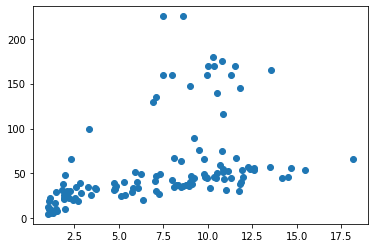

In [34]:
from matplotlib import pyplot

pyplot.scatter(penguins['Duration'], penguins['Depth'])
pyplot.show()

If we want axis labels, `matplotlib` needs to be told what they are:

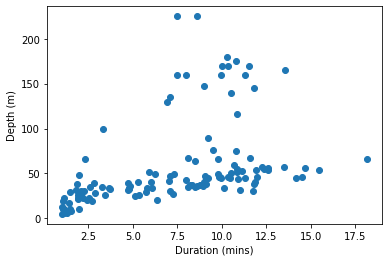

In [35]:
pyplot.scatter(penguins['Duration'], penguins['Depth'])
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('Depth (m)')
pyplot.show()

If we want something as simple as just coloring a subset of the observations differently, then we have to first fetch the subset ourselves:

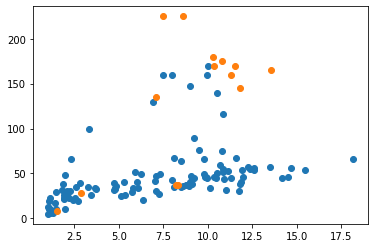

In [36]:
favorite_penguin = 'EP3901'

group1 = penguins[penguins['Bird'] != favorite_penguin]
group2 = penguins[penguins['Bird'] == favorite_penguin]

pyplot.scatter(group1['Duration'], group1['Depth'])
pyplot.scatter(group2['Duration'], group2['Depth'])
pyplot.show()

And note that this doesn't yet get us a legend showing what the two separate colors refer to. Like axis labels, legends have to be added explicitly.

Don't be a masochist. If you want a more complex figure with labels, legends, colors, and so on then use one of the other data visualization packages.

### pandas plots

A `pandas.DataFrame` has an [attribute](glossary.ipynb#attribute) called `plot`. This attribute in turn stores several [methods](glossary.ipynb#method) that can be used to plot the data from the data frame.

Let's take a look at these methods, using `dir()` (for brevity, we can omit printing the ubiquitous 'special methods' whose names begin with underscores):

In [37]:
for meth in dir(penguins.plot):
    if not meth.startswith('_'):
        print(meth)

area
bar
barh
box
density
hexbin
hist
kde
line
pie
scatter


There is a `scatter()` method, which is similar to the `scatter()` function from `matplotlib.pyplot` that we have already met (indeed, behind the scenes, this method uses `pyplot.scatter()`). The [arguments](glossary.ipynb#argument) to the `scatter()` method specify which columns of data should be matched to the *x* and *y* axes of the figure.

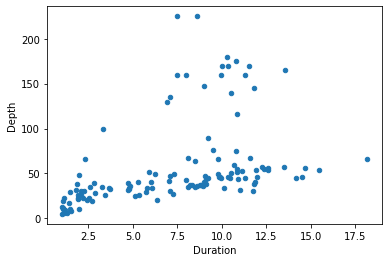

In [38]:
penguins.plot.scatter(x='Duration', y='Depth')
pyplot.show()

(Note that because `pandas` is still using `matplotlib` as the final means of creating the figure, we still use `matplotlib`'s `pyplot.show()` function to ensure the figure is displayed.)

`pandas`' plotting functions are not a huge improvement on `matplotlib`. The figure we just made is essentially the same one we got from `matplotlib` a moment ago, with just two small bonuses. First, as you may have noticed, we were able to specify the *x* and *y* arguments simply as column names (i.e. `'Duration` rather than `penguins['Duration']`), which makes for slightly briefer, clearer code. Second, `pandas` adds the column names as axis labels automatically, sparing us a little extra work.

Even this second bonus isn't always that useful. If the scales of measurement on our axes have specific units that are not already clear from the column names, then we should add these to make our figure clear. For this, we need to revert to the labeling functions from `pyplot`:

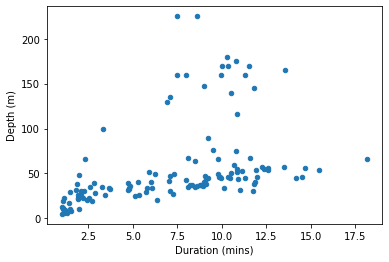

In [39]:
penguins.plot.scatter(x='Duration', y='Depth')
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('Depth (m)')
pyplot.show()

If you want to explore a bit, you can head over to Spyder, load the penguins data yourself and try out a few of the other `pandas` plot functions from the list we printed above. But be prepared for some frustration; they are mostly of fairly limited use.

### seaborn

Now we will learn about our first data visualization package that is both relatively easy to use and genuinely useful. `seaborn` is included in the default Anaconda installation, so you do not need to install it.

`seaborn` provides a wider selection of plotting functions than `matplotlib` and `pandas`. The online documentation has a full [gallery of examples](https://seaborn.pydata.org/examples/index.html), which you can browse to get an idea of what is possible. Here we will stick to the same simple figure from above, so that we can make a clear comparison with `matplotlib` and `pandas`.

The figure we have been creating so far displays the observations (in our case, dives) as points in a 2D space, where two features of those observations (duration and depth) form the two axes of the space. This kind of figure is most commonly known as a 'scatterplot', and this is also the name of the `seaborn` function for creating it. The `x` and `y` [arguments](glossary.ipynb#argument) to `scatterplot()` specify which columns of a data frame to use for the two respective axes, and the additional `data` argument tells `seaborn` which data frame these columns should be taken from.

(Note that the `x` and `y` arguments should be in quote marks, since these are just the [string](glossary.ipynb#string) names of columns, not [variables](glossary.ipynb#variable), but the `data` argument should be unquoted, because our data frame is a variable.)

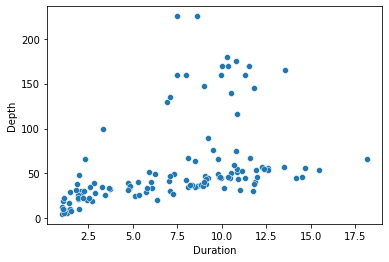

In [40]:
import seaborn

seaborn.scatterplot(x='Duration', y='Depth', data=penguins)
pyplot.show()

So far, so good. We get essentially the same plot that `pandas` gave us. And we can make the same sort of more detailed tweaks to axis labels and so on by reverting to `pyplot`:

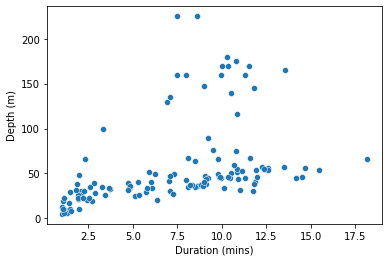

In [41]:
seaborn.scatterplot(x='Duration', y='Depth', data=penguins)
pyplot.xlabel('Duration (mins)')
pyplot.ylabel('Depth (m)')
pyplot.show()

But the really useful novelty of `seaborn` is revealed with a few additional keyword arguments. As well as just `x` and `y`, three more arguments `hue`, `style`, and `size` allow us to vary the color ('hue' essentially means 'color'), the point symbol, and the size of the points according to additional columns from the data frame.

For example, the `hue` argument provides a really simple solution to the problem of coloring subsets of the data that was so tedious with `matplotlib`:

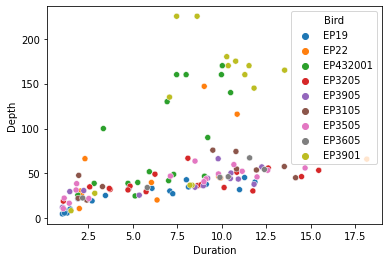

In [42]:
seaborn.scatterplot(x='Duration', y='Depth', hue='Bird', data=penguins)
pyplot.show()

And we get an automatic legend showing what the colors refer to. Praise the Lord!

These additional arguments are the best feature of `seaborn`. They allow us to show more than just two aspects of our data on one figure, with almost no extra effort. As another example, we can use the `size` argument to show how a third numerical quantity is related to the first two:

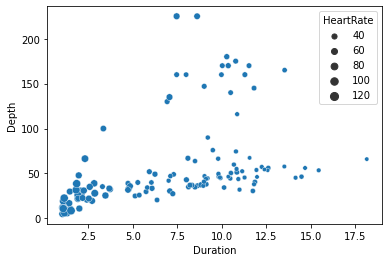

In [43]:
seaborn.scatterplot(x='Duration', y='Depth', size='HeartRate', data=penguins)
pyplot.show()

Here for example the different sizes of the points show us that the penguins' heart rates tend to be slower for the longer dives.

The functions for other figure types all work in more or less the same way: Assign column names to dimensions of the figure, such as `x`, `y`, `hue`, etc., and specify which data frame the columns should come from.

Go to the [seaborn examples gallery](https://seaborn.pydata.org/examples/index.html) and explore.

### Saving figures

We would of course like to be able to save our figures to an image file, so that we can show them to supervisors, put them on our website, print them on novelty underwear, etc. Used in place of `pyplot.show()`, `pyplot.savefig()` saves the current figure into an image file. The input [argument](glossary.ipynb#argument) is the name of the file to save to.

#### png

The *png* image format ('Portable Network Graphics'), which we met briefly in the [lesson on images](images.ipynb#Transparency), is a good one to use for websites and documents mainly intended to be read online. `savefig()` infers our desires concerning the file format from the name of the file, so all we need to do in order to get a *png* image is to use the file extension *.png*:

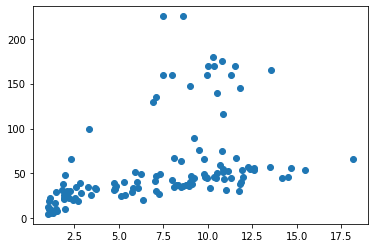

In [44]:
pyplot.scatter(penguins['Duration'], penguins['Depth'])
pyplot.savefig('penguins.png')

(Depending somewhat on where and when you run the two commands above, you may still see the figure displayed in the console as well as it being saved to file.)

The resulting image file looks just like the in-console display:

![](images/penguins.png)

As we saw above, `pandas`' and `seaborn`'s plotting functions use `matplotlib` in the background. So `pyplot.savefig()` also works for them. Try it out.

#### svg

Run one of the examples above in your console and save a *png* image file. Then go to your Python working folder in your file explorer and open up the resulting image file in your image viewer. Zoom in to the image a bit. If you zoom in enough, eventually you will see the image become blurry and 'pixelated' (like in this screenshot of part of the image zoomed to 1000%):

![](images/penguins_zoomed.png)

This doesn't look so pretty. Though very few things do when examined this closely.

You may have encountered this problem already when pasting small images into documents. It occurs because as we zoom in, the regions of the image that were originally individual tiny pixels on our screen become large enough for us to see them as distinct square regions, like in Mario Bros. This doesn't matter if we intend the image to be viewed at its default size on our website, but there are some circumstances in which it would be useful to have a version of the image that remains crisp even when zoomed in a lot, for example if we want to print our image out on a large poster to display at a conference.

An alternative image file format, *svg* ('Scalable Vector Graphics'), will stay looking 'crisp' at any zoom. Try saving an *svg* image of the penguins scatterplot (i.e. use `'penguins.svg'` as the argument to `savefig()`), then go to your file explorer, open the file, and zoom in excessively as before. (Depending on your computer, you may find that the default program for opening *svg* files is your web browser. Either try right-clicking on the file and opening it in an image viewer program instead, or use the web browser's zoom function.) You should see that the dots remain crisply circular. 

How does this magic work? Recall what we learned in the [lesson on images](images.ipynb) about how images are encoded for computers. In most image file formats the image is encoded as an [array](glossary.ipynb#array) in which the rows and columns represent the pixels of the image (most formats also add to or modify this method of encoding in some way, but the starting point remains an array). This method of encoding only contains information about each individual pixel, so the only way to display an image at a larger scale is to make each pixel take up more space on the screen. A pixel array (often called a 'bitmap') is not the only way to encode an image for a computer. A completely different method involves instead encoding the image as a set of *instructions* about what to draw where. For example: 'Dear computer, please draw circles at the following positions..., then draw a line *here* and *here*, then some text *here*, ...' and so on. This is essentially how the *svg* image file format works. It makes no reference to specific pixels, and instead just encodes what shapes should be drawn where. The result is that when we zoom in, the computer can just re-draw all the requested shapes, but larger ('Dear computer, please draw *MASSIVE* circles at the following positions, ...' etc.)

I have just told you that *svg* files take the form of instructions about what to draw. As we learned right back at the beginning of the class, instructions for a computer need to be written in a programming language of some sort. So what programming language is an *svg* file written in? Not Python, unfortunately. Although that would be convenient for us just now, it would be a bad choice for most purposes. Python is much too general a programming language to be efficient for just drawing images. *svg* files are written in their own programming language, which is based on another called XML ('eXtensible Markup Language'). We won't learn about it here, as that would take us way beyond the scope of the class, but if you are curious you can open the file [penguins.svg](examples/data/penguins.svg) in a text editor instead of in an image viewer. You will see that like a Python file it just consists of text commands. Although most of the commands are not particularly easy to understand, you should be able to find fairly easily where the *x* and *y* positions of the circles in the image are defined. And near the top of the file you may recognize a [comment](glossary.ipynb#comment) noting that the file was created by `matplotlib` (comments in XML are enclosed in `<!--  -->`).

### bokeh

Now for something completely different. All of the data visualization packages that we learned about above ultimately use `matplotlib` in the background, and so are quite similar to each other in function and in appearance. The `bokeh` package is different. The figures that it creates are somewhat like miniature 'apps' for a web browser, which can allow users to explore the data themselves. Getting this right requires taking on a little more complexity, but in return the results are more exciting.

`bokeh` is a [package](glossary.ipynb#package) that is organized into multiple [modules](glossary.ipynb#module). For basic data visualization, we need two of these:

* `bokeh.plotting` does all the drawing of shapes and axes, a bit like `matplotlib`.
* `bokeh.models` organizes the data that goes on a figure.

Let's begin by importing both of these modules from `bokeh`. (`bokeh` is included in the default Anaconda installation, so you don't need to install it).

In [45]:
from bokeh import models
from bokeh import plotting

The starting point for any figure is the `figure()` function from the `plotting` module. In most simple cases, we do not need to supply any [arguments](glossary.ipynb#argument) to this function. We just [assign](glossary.ipynb#assignment) the result into a [variable](glossary.ipynb#variable). This variable is of a new [type](glossary.ipynb#type), a `bokeh` `Figure` object:

In [46]:
fig = plotting.figure()

type(fig)

bokeh.plotting.figure.Figure

A `Figure` has [methods](glossary.ipynb#method) for drawing different kinds of shapes. To create the same kind of scatterplot that we drew with the other plotting packages, we need the `circle()` method. Just like with `seaborn`, there are *x* and *y* [arguments](glossary.ipynb#argument) to specify which columns of our data frame correspond to which axes of the figure. Also like `seaborn`, `bokeh` needs to know where these columns are to be found (but the name of this argument is `source`, rather than `data`). If the data are coming from a `pandas.DataFrame`, then `bokeh` also requires the data frame to first be converted into a slightly different format that it knows how to work with, using the `ColumnDataSource()` function from the `models` module.

So the whole command looks like this:

In [47]:
fig.circle(x='Duration', y='Depth', source=models.ColumnDataSource(penguins))

GlyphRenderer(id='1038', ...)

Making tweaks such as custom axis labels is slightly different from `matplotlib` but not too difficult. Most changes to the appearance of the figure are made via [attributes](glossary.ipynb#attribute) of the `Figure` variable. For example, to change the label of the *x* axis, we can [assign](glossary.ipynb#assignment) a new [string](glossary.ipynb#string) into the `xaxis.axis_label` attribute. And you can probably work out the name of the corresponding attribute for the *y* axis.

In [48]:
fig.xaxis.axis_label = 'Duration (mins)'
fig.yaxis.axis_label = 'Depth (m)'

Because `bokeh` is not based on `matplotlib`, we do not need `pyplot.show()` to see the finished figure. Instead, we need the `show()` function from `bokeh`'s own `plotting` module. The [argument](glossary.ipynb#argument) is the variable that stores our `Figure` object:

In [49]:
plotting.show(fig)

#### Interactivity

The main novel feature of `bokeh` is that it produces interactive plots. The buttons in the attractive-looking toolbar at the right are clickable.

Try out the toolbar. Some of the buttons activate tools for zooming and selecting portions of the figure. Their symbols are mostly intuitively recognizable if you are familiar with computer apps, and you can hover the mouse over them to see their full names. Once you have zoomed or moved the figure and you want to set it back the way it was at the beginning, you can click the reset button:

![](images/Reset.png)

These are the default data exploration tools provided on a `bokeh` figure. There is a lot more that can be done, such as adding buttons for showing and hiding subsets of the data. However, the most exciting interactive features require running a 'server' on which to host our figures. This quickly gets quite complex, and goes somewhat beyond our Python skills at this stage. I leave it as an exercise for the interested reader to head over to the [bokeh gallery](https://docs.bokeh.org/en/latest/docs/gallery.html) and explore this possibility. Here we will look just at one simple bit of extra interactivity that will still work with the basic `plotting.show()`: adding a 'hovering' window with information about each observation.

The `models` module provides functions that create additional buttons for that nice-looking toolbar. A lot of these are not really that useful, and are mainly there for people who want to wow their audience with loads of cool chart junk, but a few are genuinely informative. `HoverTool()` adds a small 'hovering' window that opens when you move the mouse cursor onto one of the data points. The `tooltips` [argument](glossary.ipynb#argument) allows us to configure what information is displayed in this window. This information should take the form of a [list](glossary.ipynb#list) of [tuples](glossary.ipynb#tuple). Each tuple is of the form *(label, data)*, where the 'label' is the displayed name of a piece of information, and the 'data' instructs `bokeh` what piece of information to display next to that label. Both of these are given as [strings](glossary.ipynb#string). Within the 'data' string, the `'@'` character lets `bokeh` know that a piece of information refers to one of the columns in our data frame. Finally, we can add a new button to our figure with the figure's `add_tools()` [method](glossary.ipynb#method). That all sounds rather abstract, so let's see an example:

In [50]:
hover_info = [('Penguin ID', '@Bird'),
              ('Depth', '@Depth'),
              ('Duration', '@Duration')]

fig.add_tools(models.HoverTool(tooltips=hover_info))

plotting.show(fig)

You may need to turn on the new hover tool by clicking its icon:

![](images/Hover.png)

Then if you move the mouse cursor over one of the points on the figure you should see some information about the dive depth and duration, and the ID of the penguin that made the dive.

#### Saving bokeh figures

If you tire of interactivity and just want to save your `bokeh` figure as a static image, there is a save button (the floppy disk icon) in the toolbar. But what if we want to save the interactive version? To save a `bokeh` figure as a webpage that will continue to be interactive each time it is opened, we need two functions from the `plotting` module:

* `output_file()` sets up an output file. The file format will be HTML, so we should give the filename the *html* file extension. The optional `title` argument is what will be displayed in the title bar of the browser window.
* `save()` saves a specific figure to the file.

In [51]:
plotting.output_file('penguins.html', title='Penguins!')
plotting.save(fig)

'/home/lt/GitHub/introduction-to-programming/content/examples/penguins.html'

To see what the resulting file looks like, you can either run the above commands yourself in your Spyder console and then go find the file in your file explorer, or you can take a look at one I made earlier, [penguins.html](examples/data/penguins.html).

## Statistical models

The final component of a basic data analysis is to relate the data to one or more idealized mathematical models of the underlying process that generated them. This step isn't always necessary; particularly if we are just exploring the data, a good visualization and some summary statistics may be sufficient to make the important features clear. But having a formal mathematical model of a phenomenon can bring a few extra benefits:

* *Prediction*. We may wish to be able to predict new observations, for forecasting, targeted advertising, etc. A mathematical formula can do this, and to the extent that the formula fits our current observations well it may also be more or less correct for future observations.
* *Theory validation*. We may have more than one competing theory about the phenomenon in question. If we can formalize these theories as mathematical formulas, then we may make inferences about the approximate truth of the theories based on how well their corresponding formulas describe the data.
* *Efficient communication*. A mathematical formula provides a compact description of our data that may be a good substitute for describing the data exhaustively if the formula is approximately correct.
* *Supervisor satisfaction*. Many academic supervisors insist on seeing a statistical analysis of some sort. Though we should beware of letting this tendency get out of control, it usually does no harm to keep them happy.

So what is a statistical model? In brief, it is a formal description of a process that generates some observable phenomenon. We can make this more concrete by way of an example. Consider our example data set. We might be interested in predicting how diving penguins alter their heart rate. So the heart rate is the 'outcome' of interest. We might even have some tentative theories about why they do this. For example, our current theory might be that penguins reduce their heart rate according to the duration of a dive, so as to avoid using up all the oxygen in their blood too soon. So we come up with the following formula as an initial simple model of diving penguin heart rate. It states that the heart rate ($h$) starts at a normal baseline of 100 bpm, and reduces by 5 bpm for each minute of dive duration ($dur$):

$$
h = 100 - 5dur
$$

So for example on a dive that lasts 10 minutes, we expect a penguin's heart rate to be $100 - 5 \times 10 = 50$ bpm.

Let's look at several important refinements to this notion of a mathematical model.

### Predictors

In the example model above, we called the heart rate $h$, the 'outcome' measure. The outcome is the measurable phenomenon that we are interested in explaining or predicting. The corresponding name for the other quantity in our model, the dive duration $dur$, is 'predictor'. Predictors are other measurements that we hope to be able to plug into our formula in order to predict the value of the outcome measurement.

A model formula may make use of more than one predictor. In our example, we might have a more tentative additional theory that penguins also use changes in heart rate partly to regulate blood pressure, so that on deeper dives their blood pressure matches the greater pressure of the water surrounding them (I have no idea whether this makes physiological sense; humor me, it's an example). So we come up with a refined model that also states that heart rate *increases* a little with each additional meter of dive depth ($dep$):

$$
h = 100 - 5dur + 0.5dep
$$

So for example on a dive that lasts 10 minutes and goes 20 meters deep, we expect a penguin's heart rate to be $100 - 5 \times 10 + 0.5 \times 20 = 60$ bpm.

### Errors

Are the two example models above any good? The answer to this will depend on what exactly we want to do with the models. How accurate do we need their predictions to be? In the absence of any specific criterion for what constitutes a 'good enough' model we can at least still ask *how accurate* a model's predictions are. There are a few ways of measuring prediction accuracy, but one of the simplest is to compare the results of a model formula to the observed outcomes in our data, and ask how close the formula gets to the true values, on average. In our case, this means plugging the observed values of dive duration and depth into the formulas to get the predicted heart rate for each dive, then comparing these numbers to the actual observed heart rates.

Let's do this for the first model, with dive duration only. The first step is to put the 'Duration' column of our data frame into the formula:

In [52]:
predicted = 100 - 5 * penguins['Duration']

Then we calculate the difference between these predicted values and the observed heart rate values from the 'HeartRate' column. Such differences between predictions and true values are often termed 'errors':

In [53]:
errors = predicted - penguins['HeartRate']

We can then ask a few things about the errors. For example how large are the largest errors?

In [54]:
min(errors)

-39.416666500000005

In [55]:
max(errors)

35.0000835

This tells us that at its worst our model underestimates the heart rate of our penguins by nearly 40 bpm, and overestimates by about 35 bpm. This seems like quite a lot, but maybe these two mistakes are anomalies. We can also ask how far the model's predictions are from the true heart rates, on average.

(We need to apply the averaging to the absolute values of the errors, since some will be underestimates and some overestimates, and these would cancel each other out if we just calculated the average):

In [56]:
statistics.mean(abs(errors))

13.157672024

So this model gets the heart rate wrong for these penguins by about 13 bpm, on average.

We can compare this to the average error of the second example model, the one that also takes dive depth into account:

In [57]:
predicted_model2 = 100 - 5 * penguins['Duration'] + 0.5 * penguins['Depth']
errors_model2 = predicted_model2 - penguins['HeartRate']

statistics.mean(abs(errors_model2))

36.945893368

This model seems to do rather worse, missing the true heart rates by more than 35 bpm on average.

We will look in a moment at some more systematic ways of comparing competing models. Comparing average errors is a little crude and may leave out important details; I include it here to give you some insight into the concepts of models, predicted values, and errors.

#### Error distributions

If we would like our model formula to be formally more complete, we can also explicitly mention the errors. They are typically denoted by the Greek lowercase *epsilon* ($\epsilon$). For example, the model formula for our first example model, with errors included, is:

$$
h = 100 - 5dur + \epsilon
$$

This formula states that the heart rate on a dive is 100 bpm, minus 5 bpm for each minute of the dive, plus some random error reflecting the admission that the rest of the formula won't get the heart rate *exactly* right for every dive.

Just throwing in an $\epsilon$ like this seems a bit cowardly. Rather like adding a disclaimer: '... but please still count my model as correct even if its predictions are *completely* wrong.' We can do a little better. Consider what we observed when we explored the errors from our model above. The largest errors were no greater than ± 40 bpm, and on average much smaller than that. We generally do not expect the errors in a model to be utterly unpredictable. Instead, although we cannot say in advance what the error for each specific new prediction will be, we can say that it will tend to be within a given range and will only rarely go beyond certain limits, etc. One way of formalizing this additional detail in our model is to specify an 'error distribution', a 'spread' of likely values for the errors.

Let's look at a [histogram](https://en.wikipedia.org/wiki/Histogram) to see the spread of the errors from our first example model. (We can use basic `pyplot` for something simple like this):

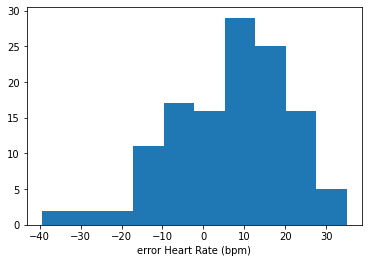

In [58]:
pyplot.hist(errors)
pyplot.xlabel('error Heart Rate (bpm)')
pyplot.show()

The errors seem to be drawn from a very approximately bell-shaped, or '[normal](https://en.wikipedia.org/wiki/Normal_distribution)' distribution; most errors cluster close(-ish) to zero, and errors far from zero are rare. The normal distribution is a common choice of error distribution, in part because it has convenient mathematical properties, and in part because it [occurs naturally](https://en.wikipedia.org/wiki/Central_limit_theorem) given certain assumptions that often hold true.

If we want to go the whole hog with our model notation, we can specify that our model states that the errors are normally distributed like this:

$$
h = 100 - 5dur + \epsilon, \ \epsilon \sim \mathcal{N}(0,\sigma^2)
$$

* $\sim$ means 'is distributed as...'
* $\mathcal{N}$ refers specifically to the normal distribution.
* $0$ is the first 'parameter' of the normal distribution, its mean. In this case, we expect the mean error to be zero; that is, the predicted heart rates are on average neither systematic underestimates nor systematic overestimates.
* $\sigma^2$ is the second 'parameter' of the normal distribution, its 'variance', i.e. how spread out the errors are. In a finished model, we would fill this in with an actual number describing our assumptions about how large the errors will tend to be.

Don't worry to much about this last notational flourish. I include it for the sake of completeness and so that you recognize it in other statistics texts you may read. If you have understood the first part of model formulas (e.g. $h = 100 - 5dur$) then you have the most practically important ingredients.

### Free parameters

The two example models above contain a few somewhat arbitrary numbers. How did we decide that the baseline heart rate should be 100 bpm, and that heart rate should decrease by precisely 5 bpm for each minute of dive duration? It seems that we just had these numbers secreted about our person and then pulled them out. There is even one number, $\sigma^2$, the 'spread' of the errors, that has yet to be filled in at all.

In some cases, we may indeed have good reasons for putting a particular number in our model formula. For example if we are experienced penguin physiologists we might already know that the resting heart rate of an emperor penguin is 100 bpm, and so we take this as a reasonable starting point for the formula. But rather more often our theories will only give us a general idea of the structure of the corresponding model, but we won't yet know what specific numbers should go in it. For example, our theory might state only that there is indeed a baseline heart rate, and that heart rate should change constantly with dive duration. We then still need to fill in the number for the baseline heart rate and the number for the size of the change in heart rate for each minute of dive duration.

Such numbers that 'still need to be filled in' are termed 'free parameters'. They are the parts of a model that are still 'free' to take on different values in different specific versions of the model formula. When we write a model formula that still contains free parameters, they are typically represented using the Greek lowercase *beta* ($\beta$), with a number subscript to distinguish multiple free parameters. Like this:

$$
h = \beta_0 + \beta_1dur + \epsilon
$$

Here, $\beta_0$ and $\beta_1$ have taken the place of the specific numbers $100$ and $-5$ in our example formula from above.

### Fitting

So how do we decide what values to fill in for a model's free parameters?

We want our model to be as accurate as it can be. So one obvious choice for filling in the free parameters of the model is to pick values that best fit the observations that we already have. Our hope in doing so is that by 'fitting' our model to the current set of observations we will obtain a final model formula that will be most accurate in general, either just as a mathematical description of the phenomenon that is of interest in itself, or in more applied cases as a means of predicting new values of the outcome measurement.

#### Ordinary least squares

In what sense do particular formulas fit data better than others? What criterion can we use to judge which numbers fit best? There are different answers possible to this question, but a very commonly-used criterion says: Pick the numbers that minimize the difference between the formula's predictions and the observed values. I.e. Pick the numbers that minimize the 'errors' that we learned about above.

There is a small subtlety to consider with this criterion. In fact, the commonly-used criterion is not to minimize the errors, but to minimize their *squares*. That is, for each candidate set of values for the free parameters, we take the errors, *square them*, then add them up, then pick the values that make this 'sum of squares' the smallest.

Why? Consider a completely minimal abstract example. We have the following two values:

In [59]:
import numpy

vals = numpy.array([6, 10])

And now we want to pick a number that is in some way minimally different from these two values. Let's write a function for calculating the overall difference between a candidate number and our two values. This function just sums up the absolute differences between the candidate number and the values, without any squaring:

In [60]:
def least_abs_diffs(candidate, values):
    return sum(abs(values - candidate))

And now let's test the function out with a not very reasonable candidate number:

In [61]:
least_abs_diffs(9000, vals)

17984

And now with a more reasonable candidate, one that is between the two values:

In [62]:
least_abs_diffs(8, vals)

4

So far, so good. As we intuitively expect, a number that is between the two values does a better job at minimizing the total differences from our values than does a number that is far from them.

But what about other numbers that are between the two values?

In [63]:
least_abs_diffs(9, vals)

4

In [64]:
least_abs_diffs(10, vals)

4

As you can probably easily see, any number that is somewhere in the middle of our two values does just as good a job of minimizing the absolute differences as any other. To relate this back to model fitting, if we use the sum of absolute errors as our criterion for choosing the best fitting numbers for the free parameters of a model, there will often be multiple winning candidate numbers. This isn't a good property if we want a reproducible method of finding the best fitting model formula.

Now consider a slightly different function, which instead sums up the squared differences:

In [65]:
def least_squares(candidate, values):
    return sum((values - candidate)**2)

least_squares(8, vals)

8

In [66]:
least_squares(9, vals)

10

In [67]:
least_squares(10, vals)

16

Now we have a unique best fitting number. Because squaring numbers quickly makes them much larger, the 'sum of squares' criterion penalizes candidate numbers that are far from any one of the values. So only a number that is 'right in the middle' will minimize the sum of squared errors. If you need to convince yourself, try it out in your Spyder console using the functions above and some other combinations of values.

This is the reason that we use the sum of *squared* errors as the criterion for how well candidate values of a model's free parameters fit the observed data.

### statsmodels

Let's now finally see how to fit and explore some different models for our penguin data using Python. As usual, the first step is to import an additional [package](glossary.ipynb#package) that provides the functions we need. The `statsmodels` package is a good starting choice. It contains functions for fitting various kinds of models, and it is included in the default Anaconda installation.

It is a fairly big package, and the part of it that we want is the `formula` module. This module provides functions that allow us to write out mathematical model formulas as [strings](glossary.ipynb#string). From within the `formula` module, we want the somewhat unhelpfully named `api` submodule. We will import it under the conventional [alias](glossary.ipynb#alias) '`smf`':

In [68]:
import statsmodels.formula.api as smf

You may remember that I [earlier complained bitterly](arrays.ipynb#Aliases) about the overuse of aliases. Perhaps I am being somewhat inconsistent here, but I think that this is one of those rare cases where an alias makes good sense. The module name `api` is not on its own particularly clear about the nature of the module, and worse, there is more than one `api` module in the `statsmodels` package, so this name on its own is ambiguous. And the alternative, using the full `statsmodels.formula.api`, is unwieldy. So we might as well use an alias here, and if we do then we should use the conventional one. We can see from the front page of the [online documentation](https://www.statsmodels.org/stable/index.html) for `statsmodels` that `smf` is the one the developers of the package use (it stands for 'Stats Models Formula').

#### Formulas

The function that we want for fitting a model to our data is called `ols()`. This is an abbreviation of 'Ordinary Least Squares', and implements the least squares criterion that we learned about above in order to pick values for the free parameters of a model formula. The first [argument](glossary.ipynb#argument) that `ols()` needs is a [string](glossary.ipynb#string) containing our model formula. Model formulas have their own special [syntax](glossary.ipynb#syntax). The syntax for writing model formulas is based on another programming language called *R*. Here are the basics:

* The formula always contains the symbol `~` (like the [tilde](https://en.wikipedia.org/wiki/Tilde) in Spanish ñ). This plays the role of the '$=$' in a mathematical model formula.
* To the left of the `~`, write the name of the 'outcome' column from the data frame, i.e. the thing that the model is intended to predict or explain. In our example, this is the 'HeartRate' column.
* To the right of the `~`, write a mathematical expression. `statsmodels` will assume that each quantity in this expression should be multiplied by a free parameter, and it will find best fitting values for those free parameters.
  * The expressions in the formula will usually involve 'predictor' columns from the data frame. For example in our case the 'Depth' and 'Duration' columns.
  * It follows that the lone number `1` in a model formula stands for a constant 'baseline' number in the formula (the $\beta_0$ from our example formula above), because a free parameter multiplied by 1 will just be itself.
* We don't need to put the errors ($\epsilon$) into the formula.

Let's take one of our example model formulas, the one that only makes use of dive duration as a predictor:

$$
h = \beta_0 + \beta_1dur + \epsilon
$$

And turn it into a formula string for `statsmodels` following the rules we just learned:

In [69]:
formula_dur = 'HeartRate ~ 1 + Duration'

And now we can input this formula to `ols()`. As was the case with some of the plotting functions we learned about earlier, an additional `data` argument tells `ols()` where to get the data from.

In [70]:
m_dur = smf.ols(formula_dur, data=penguins)

What sort of object did we get?

In [71]:
type(m_dur)

statsmodels.regression.linear_model.OLS

This 'model' object has a `fit()` [method](glossary.ipynb#method) (`dir()` it if you don't believe me), and it is this method that implements finding the best fitting values for the model's free parameters. Since fitting a model is almost always the first thing that we want to do anyway, it is common to just apply the `fit()` method immediately, at the same time as creating the model object with `ols()`. Like this:

In [72]:
m_dur = smf.ols(formula_dur, data=penguins).fit()

#### Interpreting results

What did we get from `fit()`?

In [73]:
type(m_dur)

statsmodels.regression.linear_model.RegressionResultsWrapper

We get a 'ResultsWrapper'. This is the object that contains the results of the model fit, which is what we (and probably our supervisors) want to see. The `summary()` method gets us a nicely-formatted printout:

In [74]:
print(m_dur.summary())

                            OLS Regression Results                            
Dep. Variable:              HeartRate   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           2.35e-35
Time:                        01:10:38   Log-Likelihood:                -507.24
No. Observations:                 125   AIC:                             1018.
Df Residuals:                     123   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.9020      2.601     37.256      0.0

There is a lot going on in the summary. We won't cover it all. Here are the highlights:

* Top left panel:
  * What was the outcome ('Dependent Variable')? 'HeartRate', as we requested.
  * What method was used to fit the model formula to the data? Least squares.
  * How many observations? (I.e. how many dives in our case).
  * For some reason also the date and time.
* Top right panel:
  * We will return to some of these later, but they are all measures of how 'good' the model is, in various different senses. Some of these numbers are not easily interpretable on their own, but they can be used to compare different competing models.
* Middle panel:
  * The rows of this table refer to the free parameters of our model. In our case we have:
    * Intercept. This term refers to the constant 'baseline' number (the $\beta_0$ in our formula).
    * Duration. The 'multiplier' for the effect of dive duration on heart rate (the $\beta_1$ in our formula).
  * The columns of the table give different pieces of information about each free parameter:
    * coef ('coefficient'). The chosen best fitting value. So our fitted model formula becomes: $h = 97 - 5.5dur + \epsilon$.
  * std err ('standard error'). Loosely speaking, a measure of how inaccurate the fitted value may be as an estimate of the true value in the overall population (of penguin dives in our case). Since this number reflects the expected amount of *inaccuracy*, larger numbers are 'worse'.
  * Forget the remaining columns. Your supervisor may get excited about them, but they aren't really all that useful.
* Bottom panel:
  * Forget this too. Some of this information can be quite useful, but it gets complicated and proper explanation goes way beyond the basics that we are covering here.

### Visualizing models

For getting an overall impression of the nature of our model, a picture is better than numbers. Let's visualize the penguins data, along with the model that we just fit to them.

The kind of model that we just applied is called a 'linear model'. The model formula can be thought of as describing a line drawn through a plot of the data. If we put the outcome (heart rate) on the *y* axis, and the sole predictor (dive duration) on the *x*  axis, then our model formula $h = 97 - 5.5dur$ describes a straight line across the space of the figure.

The `seaborn` plotting package, which we learned about above, provides a function `lmplot()` ('linear model plot') for visualizing such a line along with the data:

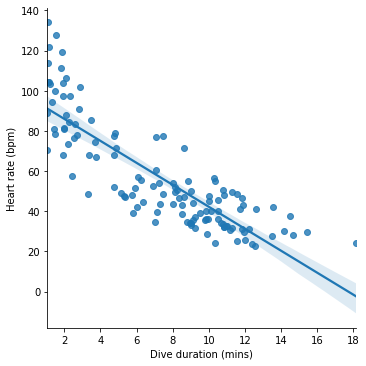

In [75]:
seaborn.lmplot(x='Duration', y='HeartRate', data=penguins)
pyplot.xlabel('Dive duration (mins)')
pyplot.ylabel('Heart rate (bpm)')
pyplot.show()

The line represents the model's predictions for heart rate across different dive durations. If we take a given dive duration, say 10 minutes, find this value on the *x* axis, read upwards until reaching the line and then read across to the *y* axis, we get the predicted heart rate for this dive duration, which for 10 minutes looks like about 40 bpm.

The fitted model also has a `predict()` [method](glossary.ipynb#method), which we can use to get predictions. The [argument](glossary.ipynb#argument) to `predict()` is a [dictionary](glossary.ipynb#dictionary) containing values for the predictors in the model:

In [76]:
m_dur.predict({'Duration': 10})

0    42.221752
dtype: float64

So for a 10-minute dive our model predicts a heart rate of about 42 bpm.

### Checking models

Take another look at the figure above that visualizes our model. The model line goes approximately through the center of the cloud of dives, meaning that for most dives the model's predictions about heart rate are close to the true observed heart rates. Which is good.

But we can also see that the model makes some systematic mistakes. At the extremes of the dive duration scale, the model consistently underestimates the penguin's heart rate. We can see this from the fact that at the far left and right of the figure, the model line lies beneath most of the points. This suggests that there are some consistent aspects of penguin diving that our model does not account for.

Sometimes, an alternative visualization can make this kind of systematic error even clearer. If we use the * y* axis to show not the actual heart rates but the errors (remember these are the differences between the predicted and observed heart rates), we can whether there are any areas of the figure in which the errors are particularly large or are systematic under- or overestimates.

`seaborn`'s `residplot()` function produces such a figure ('resid' is an abbreviation of 'residual', and 'residuals' is an alternative name for what we called 'errors' above).

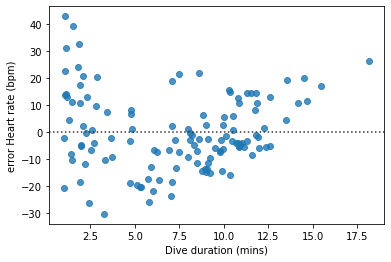

In [77]:
seaborn.residplot(x='Duration', y='HeartRate', data=penguins)
pyplot.xlabel('Dive duration (mins)')
pyplot.ylabel('error Heart rate (bpm)')
pyplot.show()

The systematic pattern in the model's mistakes is a little clearer in this figure.

### Non-linearities

Might there be a better model of penguin heart rates that avoids the systematic errors we just discovered?

We need to think about the mismatch between the form of our model and the phenomenon at hand. If we look at the scatterplot showing the relationship between heart rate and dive duration, we see that heart rates slow down quite rapidly with each extra minute of diving time, but only for dives of up to about five or six minutes. For longer dives, heart rate still gets slower, but the differences between longer dives are not as great. This makes a certain amount of penguin physiological sense. Presumably penguins cannot continue slowing their heart rate indefinitely, or they would fall into a coma or die while swimming. So as we get close to the slowest heart rate that is feasible, a longer diving time no longer reduces heart rate quite as much. Our model cannot account for this fact, because it contains a constant multiplier of dive duration. Visually, this is reflected in the fact that the model line on the `lmplot` is straight.

#### Logarithms

What sort of model formula would describe a curved line instead? There are lots of possibilities, but they all involve using some mathematical function of dive duration as the predictor instead of, or as well as, dive duration itself. A simple starting point is to use the logarithm of dive duration as a predictor in place of dive duration itself.

In case you need to remind yourself, remember that logarithms 'compress' the scale of a set of numbers, making large numbers proportionately not so large. Let's see this in action, using `numpy`'s `log()` function with a sequence of numbers:

In [78]:
numpy.log([1, 2, 5, 10, 20])

array([0.        , 0.69314718, 1.60943791, 2.30258509, 2.99573227])

We see that the logarithm function brings the largest values closer to the smaller ones. So if we use the logarithm of dive duration as our predictor, the effect of long dive durations on heart rate will be diminished, which is just what we want to achieve.

Our revised model formula now looks like this:

$$
h = \beta_0 + \beta_1log(dur) + \epsilon
$$

Let's see this model visualized. The `lmplot()` function has an optional `logx` [argument](glossary.ipynb#argument) that we can set to `True` to show the model line with the logarithm of the *x*  axis quantity as the predictor.

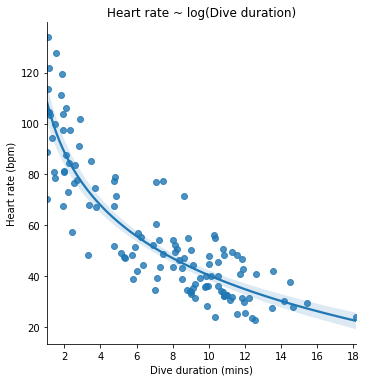

In [79]:
seaborn.lmplot(x='Duration', y='HeartRate', data=penguins, logx=True)
pyplot.title('Heart rate ~ log(Dive duration)')
pyplot.xlabel('Dive duration (mins)')
pyplot.ylabel('Heart rate (bpm)')
pyplot.show()

Let's also fit the logarithmic model to our data and see a summary, as we did for the first model. We can use `numpy`'s math functions in a model formula:

In [80]:
formula_log_dur = 'HeartRate ~ 1 + numpy.log(Duration)'
m_log_dur = smf.ols(formula_log_dur, data=penguins).fit()

#### Polynomials

Let's throw in one more model. Like the logarithmic model, it is one that can account for non-straight relationships between the predictor and the outcome. But it does so by a different mathematical means.

Instead of a logarithm, our final model includes dive duration plus both the square and the cube of dive duration as predictors:

$$
h = \beta_0 + \beta_1dur + \beta_2dur^2 + \beta_3dur^3 + \epsilon
$$

We can use `numpy`'s `power()` function to put powers of a predictor into a model formula (the second argument to `power()` is the exponent, so `2` for 'squared', `3` for 'cubed', etc.):

In [81]:
formula_cubic_dur = 'HeartRate ~ 1 + Duration + numpy.power(Duration, 2) + numpy.power(Duration, 3)'
m_cubic_dur = smf.ols(formula_cubic_dur, data=penguins).fit()

Mathematical functions like this one that sum up successive powers of a quantity (the square, the cube, etc.) are often called 'polynomials'. The number of successive powers included in the formula is sometimes referred to as the 'degree' or 'order' of the polynomial. So our example model above is a '3rd-degree' or '3rd-order' polynomial.

To get an idea of what this model might look like in action, let's remind ourselves of the behavior of polynomial functions. Here for example is a figure showing the relationship between some quantity $x$ and the sum of $x$, $x^2$, and $x^3$:

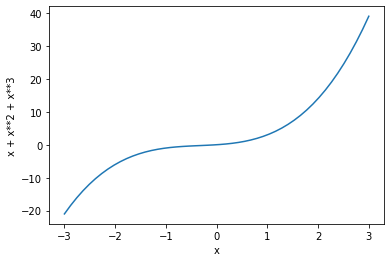

In [82]:
x = numpy.linspace(-3, 3)
y = x + x**2 + x**3

pyplot.plot(x, y)
pyplot.xlabel('x')
pyplot.ylabel('x + x**2 + x**3')
pyplot.show()

(If you are wondering about the `numpy` function `linspace()`, take a look at its [documentation page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html).)

Each successive power in a polynomial formula adds one more 'bend' to the curve that relates the *x* quantity to the sum of its powers. If we use such a formula in a statistical model, the free parameters for each of the powers of the predictor describe the position and 'abruptness' of each of the bends.

In our example polynomial model, we have two additional powers of dive duration, so it is capable of describing a relationship between dive duration and heart rate that has up to two bends in it. Once fitted to our penguin data, it looks like this (We use the `order` argument to `lmplot()` to specify that we want to see a 3rd-order polynomial model):

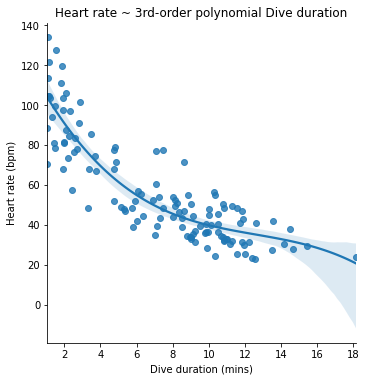

In [83]:
seaborn.lmplot(x='Duration', y='HeartRate', data=penguins, order=3)
pyplot.title('Heart rate ~ 3rd-order polynomial Dive duration')
pyplot.xlabel('Dive duration (mins)')
pyplot.ylabel('Heart rate (bpm)')
pyplot.show()

We can see from the `lmplot` that the first bend in the model does more or less the same job as the logarithmic model did; it describes the slowing in the rate of decrease in heart rate as dive duration gets longer. The second bend (the final 'dip' in the curve at the right of the figure) seems to mostly do the job of accurately predicting the heart rate of the very longest dive.

### Comparing models

Which of the three models above is the better one? As with so many seemingly innocent questions in data analysis, there are different possible answers depending on what exactly we mean. Let's finish by learning about a few different criteria by which to compare competing models of our data.

For convenience, we can begin by gathering our models in a list of dictionaries. Then we can first look at their summary printouts.

In [84]:
models = [
    {'name': 'linear', 'formula': formula_dur, 'fitted': m_dur},
    {'name': 'logarithmic', 'formula': formula_log_dur, 'fitted': m_log_dur},
    {'name': 'polynomial', 'formula': formula_cubic_dur, 'fitted': m_cubic_dur}
]

for model in models:
    print(model['name'], '\n', model['fitted'].summary(), '\n\n')

linear 
                             OLS Regression Results                            
Dep. Variable:              HeartRate   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           2.35e-35
Time:                        01:10:39   Log-Likelihood:                -507.24
No. Observations:                 125   AIC:                             1018.
Df Residuals:                     123   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.9020      2.601     37.256

Take a look at the top right panel of each printout. This panel contains various pieces of information that can be used to assess how good models are.

Each of these pieces of information can also be accessed separately, as an [attribute](glossary.ipynb#attribute) of the fitted model. For example:

In [85]:
m_dur.rsquared

0.7153052896320173

#### R-squared

The first number in the top right panel is 'R-squared' ($R^2$). Very briefly, this quantity measures what proportion of the variation in heart rates is 'accounted for' (or sometimes we say 'explained') by the model. Since this number is a proportion, it can range from 0 (the model accounts for nothing), to 1 (the model accounts for all the observations perfectly).

An alternative, visual, way of thinking about this is as a quantification of how far the observations are from the model's predictions, compared to how far apart the observations are from each other in general. For example in the case of our penguin heart rates, if our model's predictions were a flat horizontal line describing no particular relationship between dive duration and heart rate, then the observed heart rates would be as far from the line as they tend to be from each other anyway. The value of $R^2$ in this extreme case would be 0.

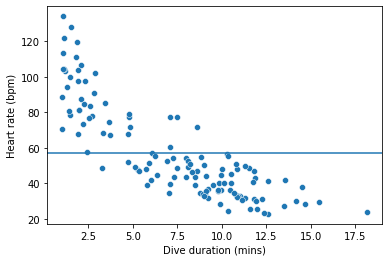

In [86]:
seaborn.scatterplot(x='Duration', y='HeartRate', data=penguins)
pyplot.axhline(numpy.mean(penguins['HeartRate']))
pyplot.xlabel('Dive duration (mins)')
pyplot.ylabel('Heart rate (bpm)')
pyplot.show()

We can check this by fitting a model of heart rate that does not take dive duration or any other predictor into account:

In [87]:
m_null = smf.ols('HeartRate ~ 1', data=penguins).fit()
m_null.rsquared

0.0

To the extent that our model's predicted heart rates instead match closely the observed heart rates, the model has 'explained' some of the variation in heart rates, and $R^2$ will be closer to 1.

If we compare the $R^2$ values for our three models, we see that the linear model explains the least variation in heart rates, and the other two models are just about as good as each other, with the polynomial model slightly ahead:

In [88]:
for model in models:
    print(model['name'])
    print(model['fitted'].rsquared, '\n')

linear
0.7153052896320173 

logarithmic
0.7914697149836116 

polynomial
0.7921208857353454 



##### Adjusted R-squared

By the $R^2$ criterion, our logarithmic and polynomial models are closely tied. But was this really a fair comparison? Let's look again at their formulas. The logarithmic model has a certain pleasing simplicity about it:

$$
h = \beta_0 + \beta_1log(dur) + \epsilon
$$

It has just two free parameters with which to adjust itself to our observed data. As we learned above, the first of these, $\beta_0$ represents the baseline or starting point of the curve. The second, $\beta_1$, represents the steepness of the curve. To look at it another way, this model has only two ways in which it can adjust itself to match our data; it can move the curve up and down, and it can bend the curve in one place. The nature of the logarithmic function is such that there are even some restrictions on how the curve may bend. For example, it cannot bend so much that it goes down and then eventually goes back up again. Though it bends, the curve must always go consistently either up or down, because the logarithms of increasing numbers still increase, only more slowly. Despite these restrictions, the logarithmic model seems to fit the observed data quite well.

Now compare the polynomial model:

$$
polynomial : h = \beta_0 + \beta_1dur + \beta_2dur^2 + \beta_3dur^3 + \epsilon
$$

The polynomial model has no fewer than four free parameters. As we learned above, together these represent the position and sharpness of two bends in the curve. And unlike the logarithmic model's bend, these bends can go up and down as much as they like. So the polynomial model has considerably more flexibility to match the pattern in our data. Yet despite this extra flexibility, it ends up being able to account for only a very little more of the variation in heart rates than the logarithmic model, as reflected in their very close $R^2$ values. What this might be telling us is that the extra flexibility of the polynomial model is not really necessary in order to provide an accurate description of the relationship between heart rate and dive duration.

An alternative criterion, the 'adjusted R-squared' (sometimes $R^2_{adj}$), takes the $R^2$ value as its starting point, but then reduces it by a 'penalty' that is related to the number of free parameters in the model formula. The general idea is to select a model that is parsimonious, in the sense that it accounts well for the observed phenomenon while remaining simple.

If we compare by $R^2_{adj}$, we see that the penalty for additional free parameters is greater for the polynomial model, making the logarithmic model now the slightly better one:

In [89]:
for model in models:
    print(model['name'])
    print(model['fitted'].rsquared_adj, '\n')

linear
0.7129906984908143 

logarithmic
0.7897743468127467 

polynomial
0.7869668581089491 



#### Cross-validation

The $R^2_{adj}$ criterion favors models that are both simple and fit the observed data well. Why should we prefer simplicity? One reason is that simpler models are often just easier to understand, and we should not underestimate the importance of clear communicability in data analysis. But there are also important practical reasons to prefer simplicity when selecting a statistical model.

Take another look at the `lmplot` of the polynomial model. I'll show it again here so you don't have to hunt back through the page:

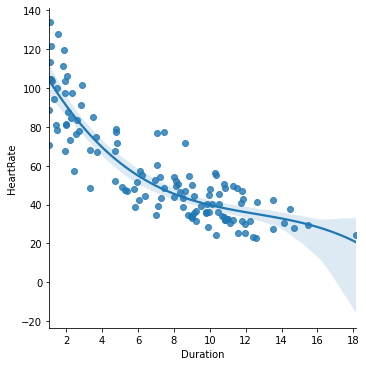

In [90]:
seaborn.lmplot(x='Duration', y='HeartRate', data=penguins, order=3)
pyplot.show()

As we noted above, the second bend in the polynomial curve seems to end up mainly accounting for just one dive, the longest dive at the far right of the figure. The curve bends downwards mainly in order to get close to this one point.

We should first think about whether this feature of the fitted model is theoretically plausible. Is it likely that after leveling off at about 35 bpm for the longest dives, penguin heart rates begin to decrease once more if the dive lasts longer than 15 minutes? Perhaps this could be the case, but it doesn't seem so believable.

What should also make us wary of accepting this feature of the model is the fact that it seems to be there mainly because of just one observation. We can check that this is indeed the case by creating a copy of our data, and changing the heart rate of that one long dive to some higher value, then looking again at the model plot:

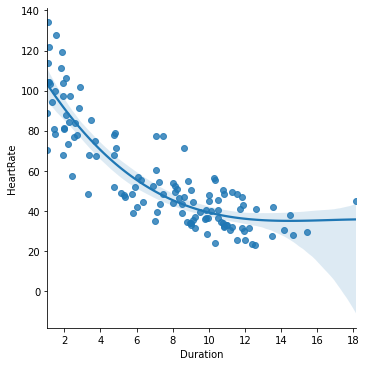

In [91]:
penguins2 = penguins.copy()
penguins2.loc[penguins2['Duration']>17, 'HeartRate'] = 45

seaborn.lmplot(x='Duration', y='HeartRate', data=penguins2, order=3)
pyplot.show()

If we had happened to monitor a very slightly different set of penguin dives, we might well have gotten a different conclusion about what happens on very long dives, just by chance. This is a bit worrying.

More complex models are more likely to exhibit this kind of 'variance'; the process of picking values for the model's free parameters can be somewhat unreliable and very dependent on the particular set of data we use. If we want to use a complex fitted model for predictive purposes, we may find that its predictions are too specifically tuned to the data we use to fit it, and are not so accurate for new observations.

Compare what happens to the simpler logarithmic model when fit to our slightly altered data set:

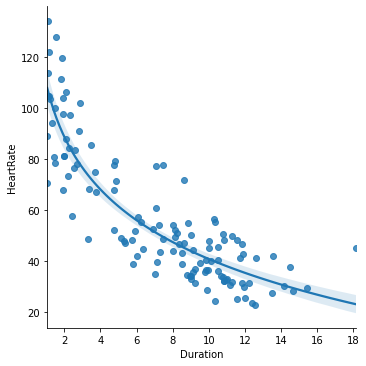

In [92]:
seaborn.lmplot(x='Duration', y='HeartRate', data=penguins2, logx=True)
pyplot.show()

The shape of the logarithmic model doesn't change that much if one extreme observation is different. It has fewer free parameters, and therefore tends to show less variance, i.e. less sensitivity to small quirks of the particular data that we fit it to. We would like to be sure that in the process of fitting our model, we have not simply ended up adjusting unnecessary free parameters to random features of our current data that will not be shared with future data (like the one extremely long dive with a very slow heart rate).

The $R^2_{adj}$ criterion already checks for unnecessary complexity to a certain extent. But we can be even more concrete about it, by estimating how good a model will be at predicting new observations. The basic idea behind this process is very simple and intuitive. We set aside some of our data and imagine that it is in fact 'new' data, which we get access to only after finishing our analysis. We then fit our chosen models to the remaining data as if they were all we had, and then once we are done with the fitting, we check how good the fitted models are at predicting the outcome values in the 'new' data that we set aside.

Still sound a little too abstract? Let's just do it, and it will become clearer.

First, we split our data frame into two sets. There are lots of different ways to do this, but a common rule of thumb is to use four fifths of the data for the model fitting (the so-called 'training' data), and reserve the remaining fifth as the imagined new data against which we will test the fitted models' predictions (the so-called 'test' data).

In [93]:
nrows_train = int(len(penguins) * 0.8)

train = penguins.iloc[:nrows_train]
test = penguins.iloc[nrows_train:]

The next step is to fit our models again, to the training data only.

In [94]:
for model in models:
    model['re-fitted'] = smf.ols(model['formula'], data=train).fit()

Now we want to take these new instances of each model and find out how accurately they predict the heart rates of the test data. Again, there are a few different ways of doing this. We will take one of the simplest and just ask for the average absolute difference between the model's prediction and the true heart rate. This gives us a summary number which should be smaller, the more accurate the model's predictions are.

In [95]:
for model in models:
    predicted = model['re-fitted'].predict(test)
    mean_abs_error = numpy.mean(numpy.abs(predicted - test['HeartRate']))
    print(model['name'])
    print(mean_abs_error, '\n')

linear
16.59950775307474 

logarithmic
15.722898582435066 

polynomial
15.793376740783055 



We can see that the results mirror the $R^2_{adj}$ criterion. When fitted only to a subset of the data, the polynomial model does slightly worse than the logarithmic model at predicting the heart rates in the remaining data.

This process in a sense simulates the real-world process of developing a model, then going out and collecting new data in order to test the model's predictions. It is known as 'cross-validation'. There are many refinements possible to the process of cross-validation. What we just did was a very crude quick demonstration. For instance, we arbitrarily split our data into just two sets, taking the first 80% of the observations. To get a more robust idea of how well our models predict new observations, we should really repeat this process several times over, mixing up and re-splitting our data each time, to make sure that our conclusion doesn't depend on the particular splitting procedure that we happened to use.

We will re-visit cross-validation more thoroughly in a later lesson, but that is enough about it for now.

## Further reading

And that is enough about data analysis in general. It is a huge topic and there remains a lot to learn about it, but we have had an overview of the most essential tasks: summarizing, visualizing, and modeling. The example program [horses.py](examples/horses.py) shows how these tasks can be put together as a simple [script](glossary.ipynb#script). The data used are the speeds of winning horses in the [Kentucky Derby](https://www.kentuckyderby.com/history).

If you would like to learn more about data analysis in Python, I recommend the comprehensive [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) by Jake VanderPlas.

## Exercise

In modeling the penguin heart rate data, we focused on one important predictor of heart rate, the duration of the dive. But there is a second predictor that might also be informative, the depth of the dive. When learning about model formulas, we briefly considered a model that treats heart rate as being linearly related to some additive combination of dive duration ($dur$) and dive depth ($dep$):

$$
h = \beta_0 + \beta_1dur + \beta_2dep + \epsilon
$$

Fit this model to the penguins data and try to answer the following questions:

* According to the fitted model, by how much does heart rate change with each additional meter of dive depth?
* What heart rate does this model predict for a 10-minute dive to a depth of 200m?
* In what way is this model better or worse than the model that uses only dive duration as a predictor?
* And in what way is it better or worse than the model that uses the logarithm of dive duration?
* We saw earlier on that penguin 'EP3901' made particularly deep dives. How do the answers to the above questions change if we leave this penguin out of the data when fitting the model?

Finding a good visualization to accompany this model is harder, as there are three numeric variables to take into account, which is not easily shown on a single set of axes. However, you can try out the `seaborn` function `pairplot()` for visualizing multiple relationships between pairs of variables in a grid of figures. Read [the documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to see how to use it.

In [96]:
cleanup()